## SETAR(2;1;1) Simulation

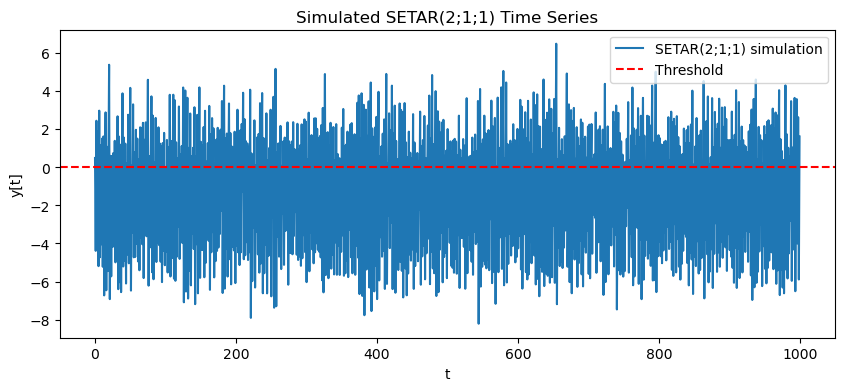

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Parameters
n  = 1000 # number of obs
x = np.zeros(n)
r = np.random.normal(0, 1, n)
threshold = 0 

a1, b1 = 4, 0.5   # R1
a2, b2 = -4, -0.5 # R2

# SETAR Sim
x[0] = r[0]
for t in range(1,n):
    if x[t-1] < threshold:
        x[t] = a1 + b1*x[t-1] + r[t]
    else:
        x[t] = a2 + b2*x[t-1] + r[t]


# Plot
plt.figure(figsize=(10,4))
plt.plot(x, label='SETAR(2;1;1) simulation')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('t')
plt.ylabel('y[t]')
plt.title('Simulated SETAR(2;1;1) Time Series')
plt.legend()
plt.show()


Model 1 regime percentages: {1: 80.5, 2: 19.5}


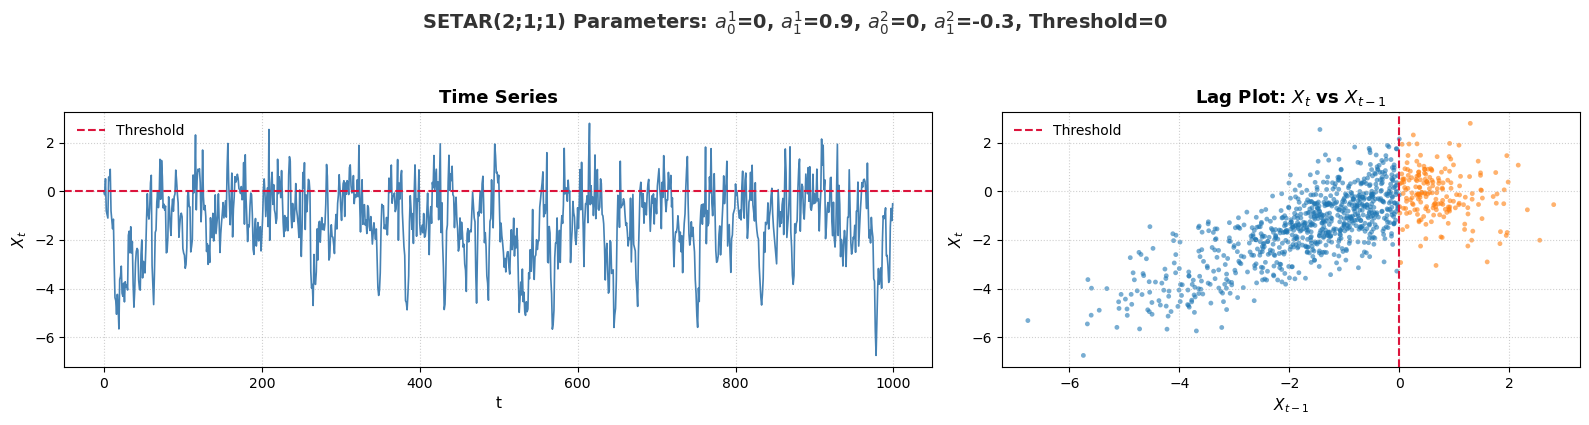

Model 2 regime percentages: {1: 51.9, 2: 48.1}


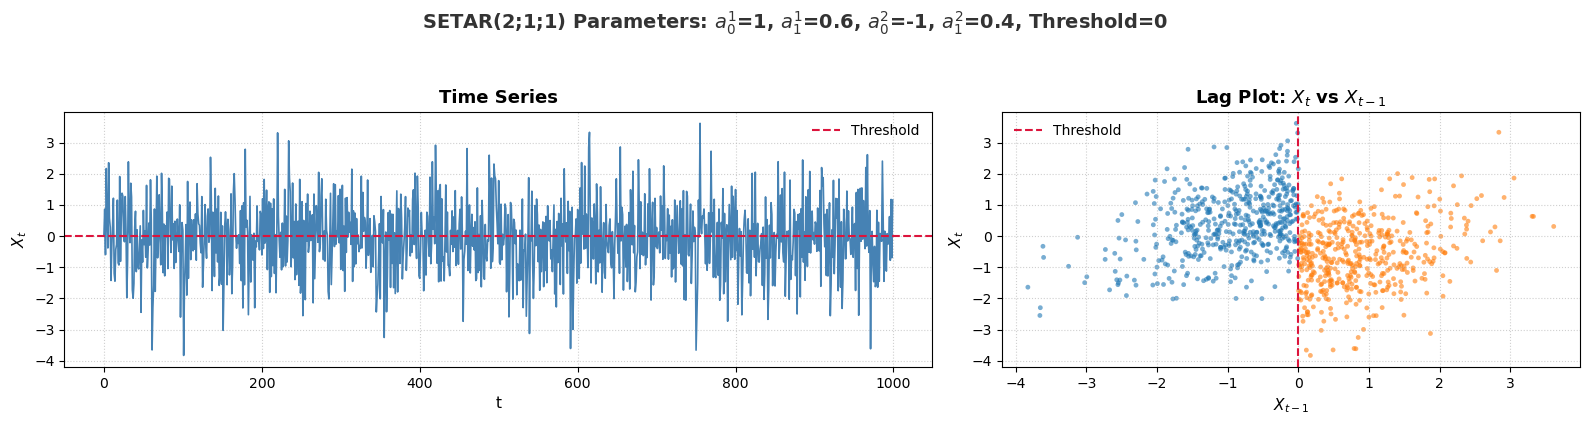

Model 3 regime percentages: {1: 61.5, 2: 38.5}


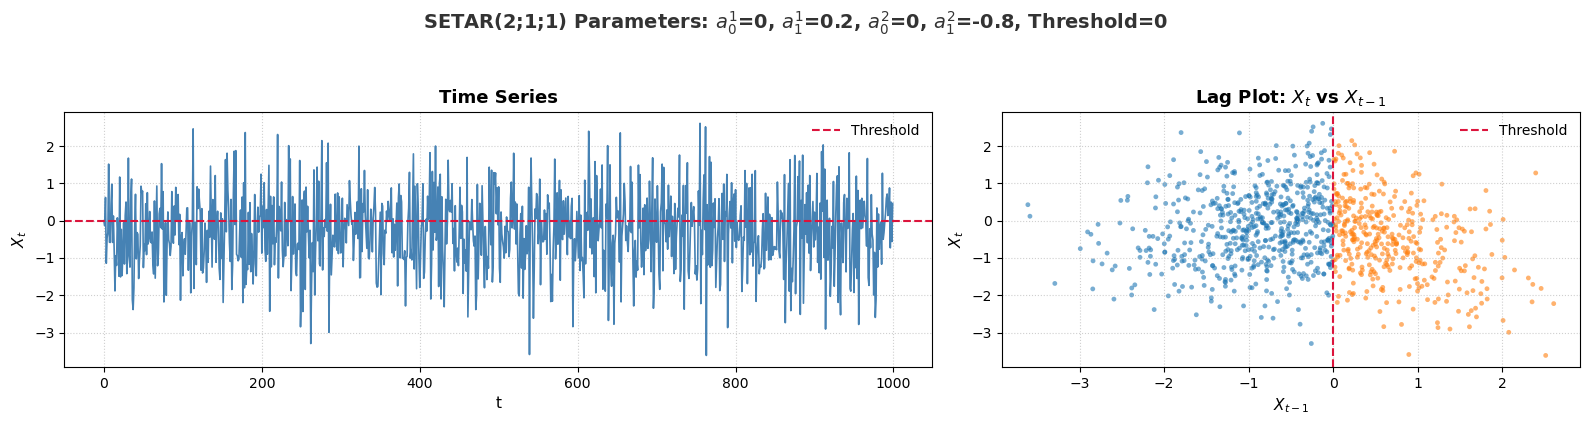

2. Varying threshold (parameters fixed)
Model 1 regime percentages: {1: 37.2, 2: 62.8}


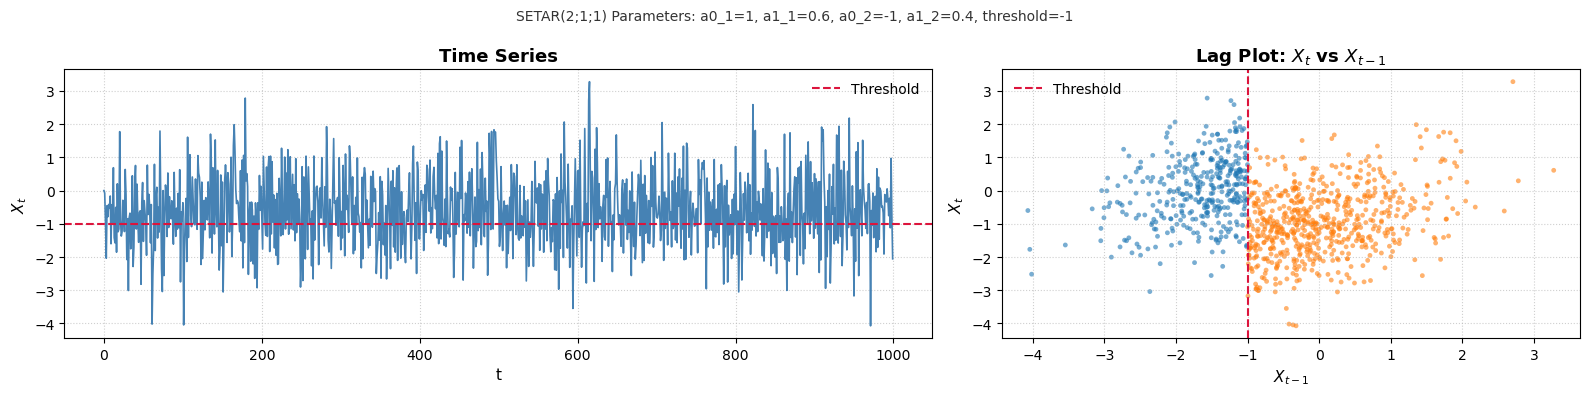

Model 2 regime percentages: {1: 51.9, 2: 48.1}


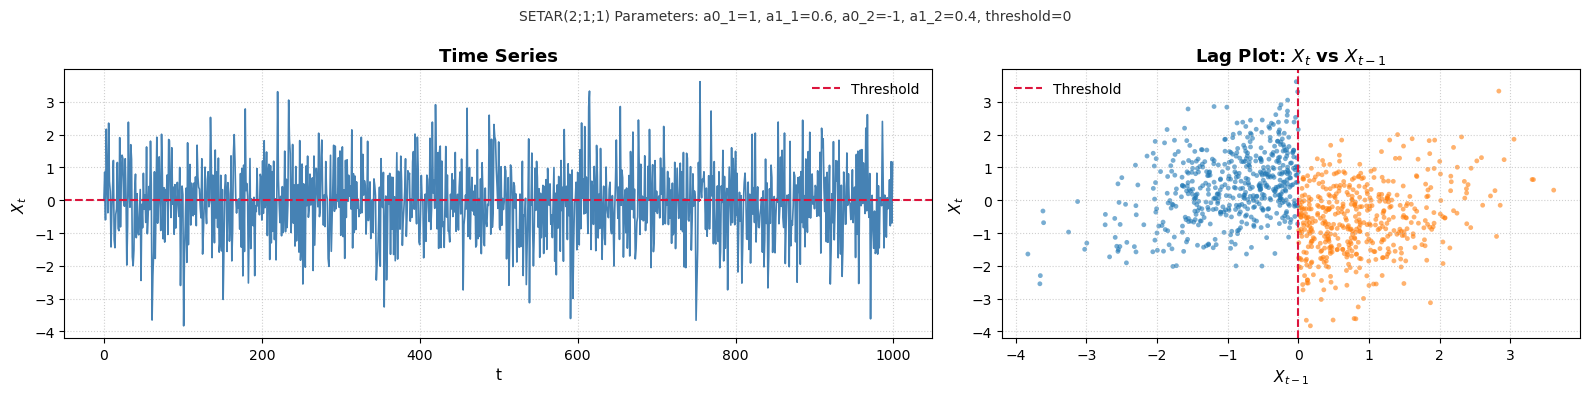

Model 3 regime percentages: {1: 66.0, 2: 34.0}


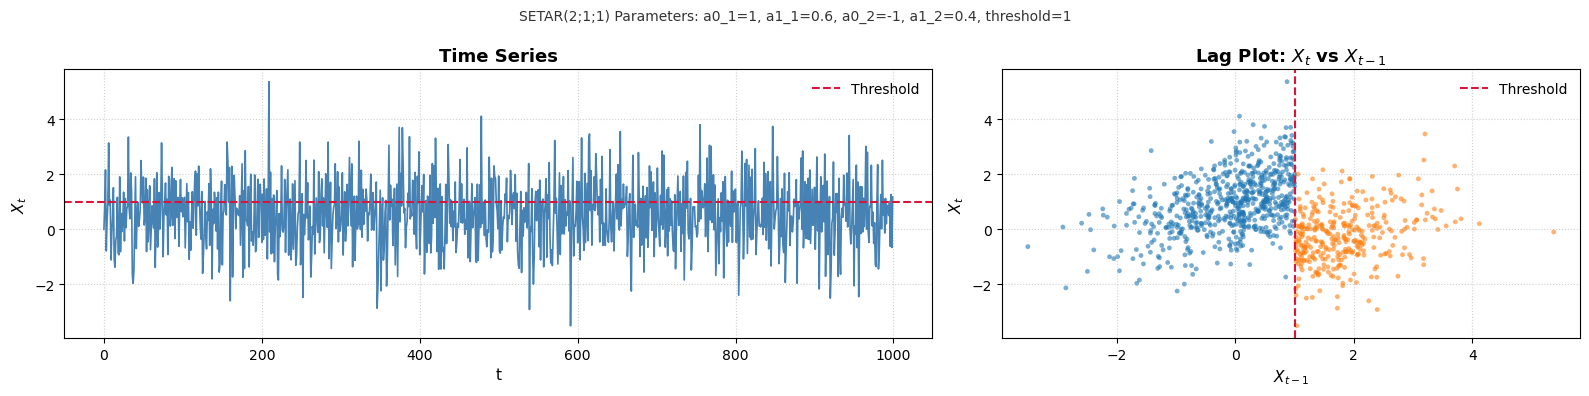

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------
# Simulate SETAR function
# ---------------------------------------------
def simulate_setar(n=1000, a0_1=0, a1_1=0.5, a0_2=0, a1_2=-0.5, threshold=0, seed = 42):
    np.random.seed(seed)
    X = np.zeros(n)
    r1 = np.random.normal(0, 1, n)
    r2 = np.random.normal(0, 1, n)
    for t in range(1, n):
        if X[t-1] <= threshold:
            X[t] = a0_1 + a1_1 * X[t-1] + r1[t]
        else:
            X[t] = a0_2 + a1_2 * X[t-1] + r2[t]
    return X

# ---------------------------------------------
# Varying parameters (threshold = 0)
# ---------------------------------------------
models_params = [
    {"a0_1": 0, "a1_1": 0.9, "a0_2": 0, "a1_2": -0.3, "threshold": 0},   
    {"a0_1": 1, "a1_1": 0.6, "a0_2": -1, "a1_2": 0.4, "threshold": 0},   
    {"a0_1": 0, "a1_1": 0.2, "a0_2": 0, "a1_2": -0.8, "threshold": 0}    
]

for i, params in enumerate(models_params):
    X = simulate_setar(**params)
    t = np.arange(len(X))
    regimes = np.where(X <= params['threshold'], 1, 2)  
    unique, counts = np.unique(regimes, return_counts=True)
    percentages = dict(zip(unique, counts / len(regimes) * 100))
    print(f"Model {i+1} regime percentages: {percentages}")

    fig, axes = plt.subplots(
        1, 2, figsize=(16, 4),
        gridspec_kw={'width_ratios': [1.5, 1]}
    )

    # Time series plot
    axes[0].plot(t, X, lw=1.2, color='steelblue')
    axes[0].axhline(params['threshold'], color='crimson', linestyle='--', label='Threshold')
    axes[0].set_title("Time Series", fontsize=13, weight='bold')
    axes[0].set_xlabel("t", fontsize=11)
    axes[0].set_ylabel("$X_t$", fontsize=11)
    axes[0].legend(frameon=False)
    axes[0].grid(True, linestyle=':', alpha=0.6)

    # Laggued plot (X_t vs X_(t-1))
    regime_colors = ['#1f77b4' if x <= params['threshold'] else '#ff7f0e' for x in X[:-1]]
    axes[1].scatter(X[:-1], X[1:], c=regime_colors, alpha=0.6, s=12, edgecolor='none')
    axes[1].axvline(params['threshold'], color='crimson', linestyle='--', label='Threshold')
    axes[1].set_title("Lag Plot: $X_t$ vs $X_{t-1}$", fontsize=13, weight='bold')
    axes[1].set_xlabel("$X_{t-1}$", fontsize=11)
    axes[1].set_ylabel("$X_t$", fontsize=11)
    axes[1].legend(frameon=False)
    axes[1].grid(True, linestyle=':', alpha=0.6)

    fig.suptitle(
        f"SETAR(2;1;1) Parameters: "
        f"$a_0^1$={params['a0_1']}, $a_1^1$={params['a1_1']}, "
        f"$a_0^2$={params['a0_2']}, $a_1^2$={params['a1_2']}, "
        f"Threshold={params['threshold']}",
        fontsize=14,
        weight='bold',
        color='#333333',
        y=1.05
    )
    plt.tight_layout()
    plt.show()
    
print(f'2. Varying threshold (parameters fixed)')
# ---------------------------------------------
# Varying threshold (parameters fixed)
# ---------------------------------------------
base_params = {"a0_1": 1, "a1_1": 0.6, "a0_2": -1, "a1_2": 0.4}
thresholds = [-1, 0, 1]

for i, th in enumerate(thresholds):
    params = base_params.copy()
    params["threshold"] = th
    X = simulate_setar(**params)
    t = np.arange(len(X))
    regimes = np.where(X <= params['threshold'], 1, 2)  # 1 = lower, 2 = upper
    unique, counts = np.unique(regimes, return_counts=True)
    percentages = dict(zip(unique, counts / len(regimes) * 100))
    print(f"Model {i+1} regime percentages: {percentages}")

    fig, axes = plt.subplots(
        1, 2, figsize=(16, 4),
        gridspec_kw={'width_ratios': [1.5, 1]}
    )
    # Time series plot 
    axes[0].plot(t, X, lw=1.2, color='steelblue')
    axes[0].axhline(params['threshold'], color='crimson', linestyle='--', label='Threshold')
    axes[0].set_title("Time Series", fontsize=13, weight='bold')
    axes[0].set_xlabel("t", fontsize=11)
    axes[0].set_ylabel("$X_t$", fontsize=11)
    axes[0].legend(frameon=False)
    axes[0].grid(True, linestyle=':', alpha=0.6)

    # Laggued plot (X_t vs X_(t-1))
    regime_colors = ['#1f77b4' if x <= params['threshold'] else '#ff7f0e' for x in X[:-1]]
    axes[1].scatter(X[:-1], X[1:], c=regime_colors, alpha=0.6, s=12, edgecolor='none')
    axes[1].axvline(params['threshold'], color='crimson', linestyle='--', label='Threshold')
    axes[1].set_title("Lag Plot: $X_t$ vs $X_{t-1}$", fontsize=13, weight='bold')
    axes[1].set_xlabel("$X_{t-1}$", fontsize=11)
    axes[1].set_ylabel("$X_t$", fontsize=11)
    axes[1].legend(frameon=False)
    axes[1].grid(True, linestyle=':', alpha=0.6)

    fig.suptitle(
        f"SETAR(2;1;1) Parameters: "
        f"$a_0^1$={params['a0_1']}, $a_1^1$={params['a1_1']}, "
        f"$a_0^2$={params['a0_2']}, $a_1^2$={params['a1_2']}, "
        f"Threshold={params['threshold']}",
        fontsize=14,
        weight='bold',
        color='#333333',
        y=1.05
    )

    fig.suptitle(
        f"SETAR(2;1;1) Parameters: a0_1={params['a0_1']}, a1_1={params['a1_1']}, "
        f"a0_2={params['a0_2']}, a1_2={params['a1_2']}, threshold={params['threshold']}",
        fontsize=10
    )
    plt.tight_layout()
    plt.show()


Observations per regime:
Regime 1 (X_(t-1) ≤ 0): 55.20%
Regime 2 (X_(t-1) > 0): 44.80%


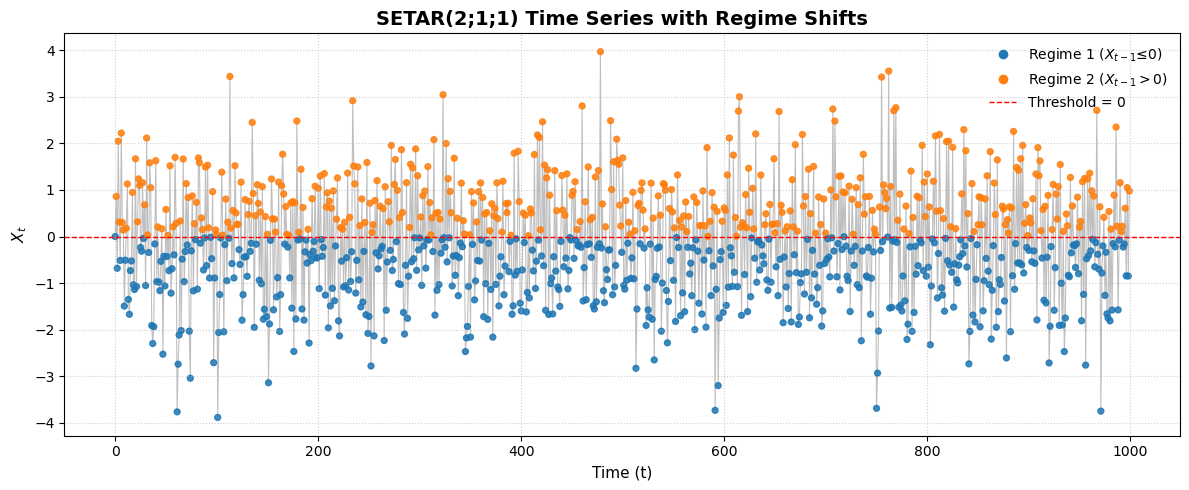

In [4]:
params = {"a0_1": 1, "a1_1": 0.7, "a0_2": -1, "a1_2": 0.3, "threshold": 0}
X = simulate_setar(**params)
t = np.arange(len(X))
regimes = np.where(X <= params['threshold'], 1, 2)  
unique, counts = np.unique(regimes, return_counts=True)
percentages = dict(zip(unique, counts / len(regimes) * 100))

print("Observations per regime:")
print(f"Regime 1 (X_(t-1) ≤ {params['threshold']}): {percentages.get(1,0):.2f}%")
print(f"Regime 2 (X_(t-1) > {params['threshold']}): {percentages.get(2,0):.2f}%")


fig, ax = plt.subplots(figsize=(12, 5))
colors = np.array(["#1f77b4" if r == 1 else "#ff7f0e" for r in regimes])  # <-- array of strings

ax.scatter(t, X, c=colors, s=18, alpha=0.85, label="X_t")
ax.plot(t, X, color="gray", lw=0.8, alpha=0.5, zorder=0)
ax.axhline(params["threshold"], color="red", linestyle="--", lw=1, label="Threshold")
ax.set_title("SETAR(2;1;1) Time Series with Regime Shifts", fontsize=14, weight="bold")
ax.set_xlabel("Time (t)", fontsize=11)
ax.set_ylabel("$X_t$", fontsize=11)
ax.grid(True, linestyle=":", alpha=0.6)

handles = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor="#1f77b4", markersize=8, label=f"Regime 1 ($X_{{t-1}} ≤ {params['threshold']}$)"),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor="#ff7f0e", markersize=8, label=f"Regime 2 ($X_{{t-1}} > {params['threshold']}$)"),
    plt.Line2D([], [], color='red', linestyle='--', lw=1, label=f"Threshold = {params['threshold']}"),
]
ax.legend(handles=handles, frameon=False, loc="upper right")

plt.tight_layout()
plt.show()


## IGAR(2;1) Simulation

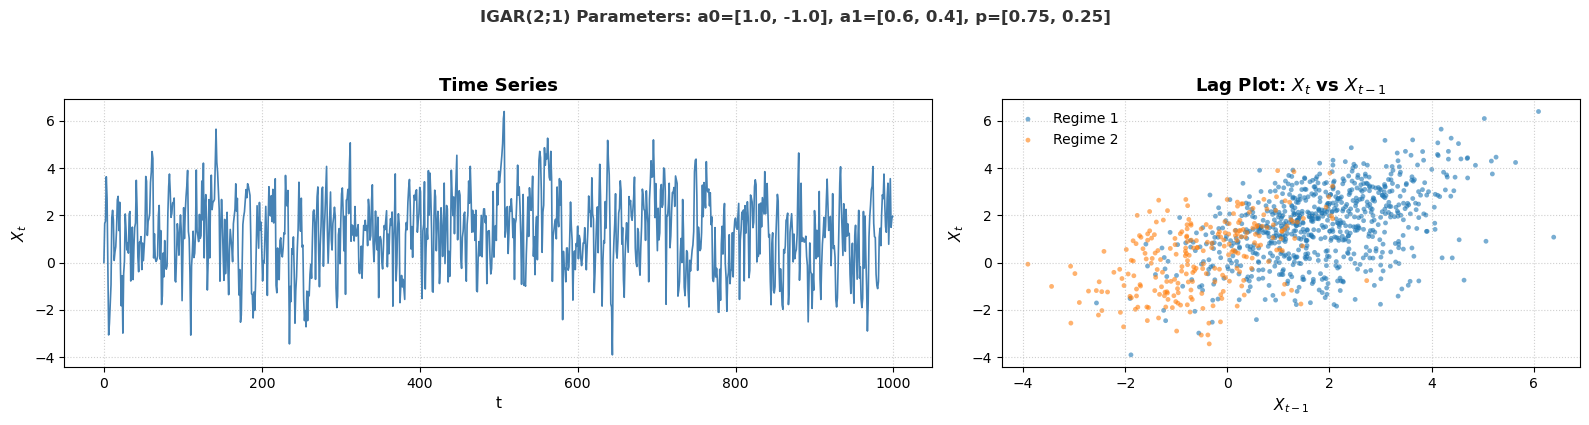

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------
# Simulate IGAR(2;1) function
# ---------------------------------------------
def simulate_igar(n=1000, a0 = [1.0, -1.0], a1 = [0.6, 0.4], p = [0.75, 0.25], seed = 42):
    np.random.seed(seed)
    X = np.zeros(n)
    regimes = np.zeros(n, dtype=int)
    l = len(a0)
    eps = np.random.normal(0, 1, (n, l))

    for t in range(1, n):
        Jt = np.random.choice(np.arange(l), p=p)
        X[t] = a0[Jt] + a1[Jt] * X[t-1] + eps[t, Jt]
        regimes[t] = Jt
    return X, regimes

params = {
    "n": 1000,
    "a0": [1.0, -1.0],
    "a1": [0.6, 0.4],
    "p": [0.75, 0.25],
    "seed": 42
}
X, regimes = simulate_igar(**params)
t = np.arange(len(X))

# ---------------------------------------------
# Plot series and lag plot
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [1.5, 1]})

# Time series
axes[0].plot(t, X, lw=1.2, color='steelblue', label='$X_t$')
axes[0].set_title("Time Series", fontsize=13, weight='bold')
axes[0].set_xlabel("t", fontsize=11)
axes[0].set_ylabel("$X_t$", fontsize=11)
# axes[0].legend(frameon=False)
axes[0].grid(True, linestyle=':', alpha=0.6)

# Lag plot X_t vs X_{t-1}
colors_map = ['#1f77b4', '#ff7f0e']
for r, color in enumerate(colors_map):
    mask = regimes[:-1] == r
    axes[1].scatter(X[:-1][mask], X[1:][mask], c=color, alpha=0.6, s=12, edgecolor='none', label=f'Regime {r+1}')

axes[1].set_title("Lag Plot: $X_t$ vs $X_{t-1}$", fontsize=13, weight='bold')
axes[1].set_xlabel("$X_{t-1}$", fontsize=11)
axes[1].set_ylabel("$X_t$", fontsize=11)
axes[1].legend(frameon=False)
axes[1].grid(True, linestyle=':', alpha=0.6)


fig.suptitle(
    f"IGAR(2;1) Parameters: a0={params['a0']}, a1={params['a1']}, p={params['p']}",
    fontsize=12, weight='bold', color='#333333', y=1.05
)

plt.tight_layout()
plt.show()

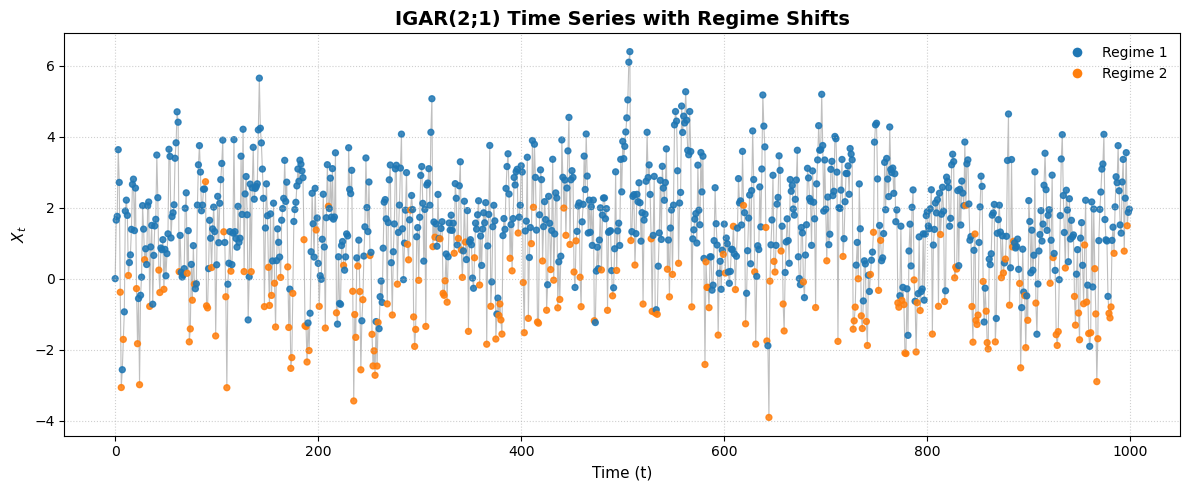

In [32]:
colors = np.array(["#1f77b4" if r == 0 else "#ff7f0e" for r in regimes])  # 0=Regime1, 1=Regime2
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(t, X, c=colors, s=18, alpha=0.85, label="$X_t$")
ax.plot(t, X, color="gray", lw=0.8, alpha=0.5, zorder=0)

ax.set_title("IGAR(2;1) Time Series with Regime Shifts", fontsize=14, weight="bold")
ax.set_xlabel("Time (t)", fontsize=11)
ax.set_ylabel("$X_t$", fontsize=11)
ax.grid(True, linestyle=":", alpha=0.6)

handles = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor="#1f77b4", markersize=8, label="Regime 1"),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor="#ff7f0e", markersize=8, label="Regime 2"),
]
ax.legend(handles=handles, frameon=False, loc="upper right")

plt.tight_layout()
plt.show()


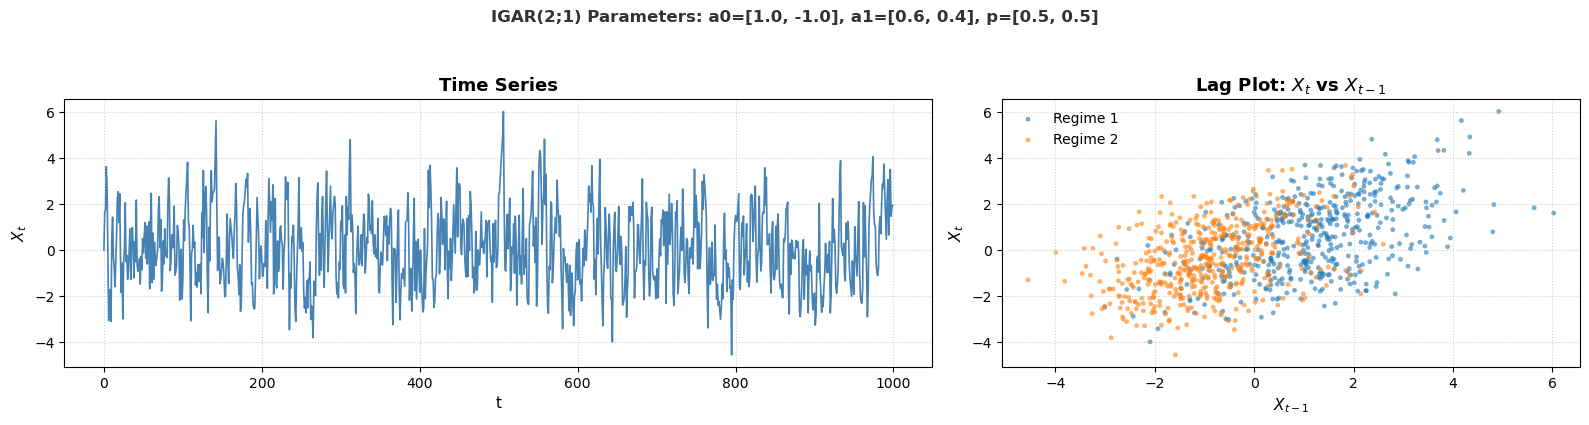

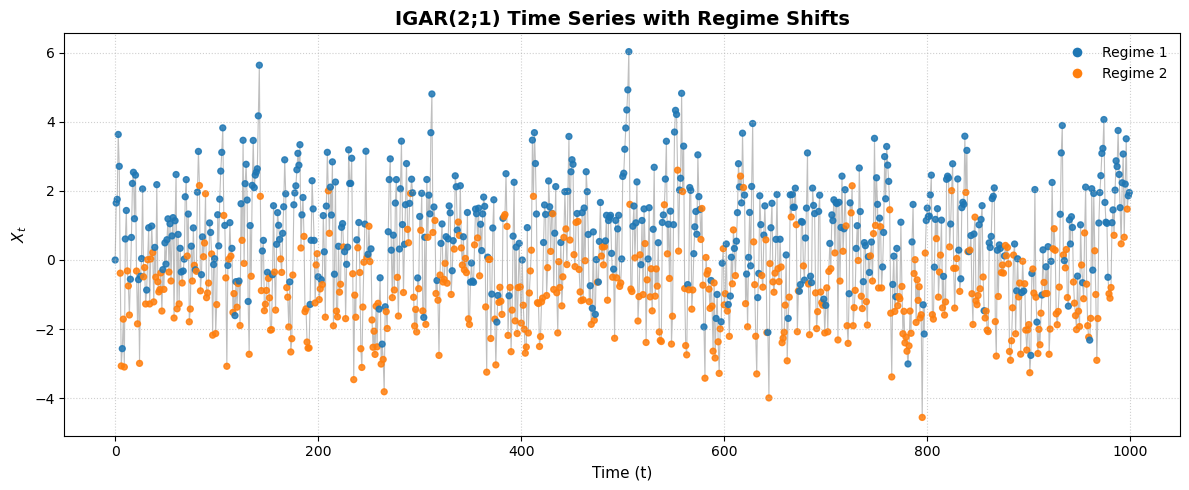

In [ ]:
# ---------------------------------------------
# Change Parameter Configuration
# ---------------------------------------------
params = {
    "n": 1000,
    "a0": [1.0, -1.0],
    "a1": [0.6, 0.4],
    "p": [0.5, 0.5],
    "seed": 42
}
X, regimes = simulate_igar(**params)
t = np.arange(len(X))

# ---------------------------------------------
# Plot series and lag plot
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [1.5, 1]})

# Time series
axes[0].plot(t, X, lw=1.2, color='steelblue', label='$X_t$')
axes[0].set_title("Time Series", fontsize=13, weight='bold')
axes[0].set_xlabel("t", fontsize=11)
axes[0].set_ylabel("$X_t$", fontsize=11)
# axes[0].legend(frameon=False)
axes[0].grid(True, linestyle=':', alpha=0.6)

# Lag plot X_t vs X_{t-1}
colors_map = ['#1f77b4', '#ff7f0e']
for r, color in enumerate(colors_map):
    mask = regimes[:-1] == r
    axes[1].scatter(X[:-1][mask], X[1:][mask], c=color, alpha=0.6, s=12, edgecolor='none', label=f'Regime {r+1}')

axes[1].set_title("Lag Plot: $X_t$ vs $X_{t-1}$", fontsize=13, weight='bold')
axes[1].set_xlabel("$X_{t-1}$", fontsize=11)
axes[1].set_ylabel("$X_t$", fontsize=11)
axes[1].legend(frameon=False)
axes[1].grid(True, linestyle=':', alpha=0.6)


fig.suptitle(
    f"IGAR(2;1) Parameters: a0={params['a0']}, a1={params['a1']}, p={params['p']}",
    fontsize=12, weight='bold', color='#333333', y=1.05
)

plt.tight_layout()
plt.show()

colors = np.array(["#1f77b4" if r == 0 else "#ff7f0e" for r in regimes])  # 0=Regime1, 1=Regime2
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(t, X, c=colors, s=18, alpha=0.85, label="$X_t$")
ax.plot(t, X, color="gray", lw=0.8, alpha=0.5, zorder=0)

ax.set_title("IGAR(2;1) Time Series with Regime Shifts", fontsize=14, weight="bold")
ax.set_xlabel("Time (t)", fontsize=11)
ax.set_ylabel("$X_t$", fontsize=11)
ax.grid(True, linestyle=":", alpha=0.6)

handles = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor="#1f77b4", markersize=8, label="Regime 1"),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor="#ff7f0e", markersize=8, label="Regime 2"),
]
ax.legend(handles=handles, frameon=False, loc="upper right")

plt.tight_layout()
plt.show()

## STAR(2;1;1) Simulation

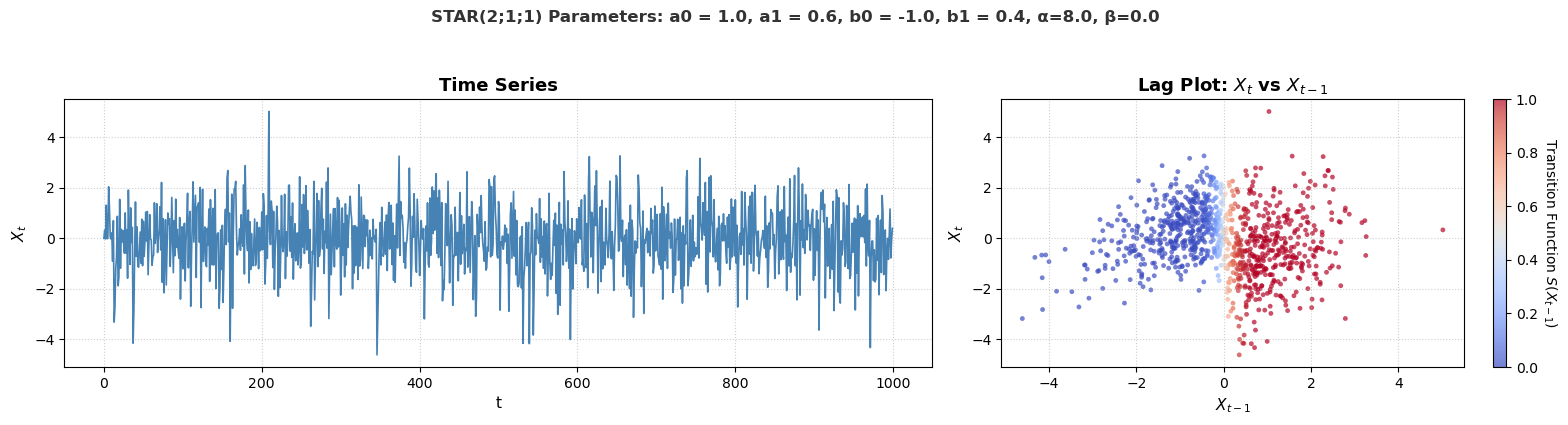

C:\Users\alba\AppData\Local\Temp\ipykernel_11520\1189346819.py:68: UserWarning: Adding colorbar to a different Figure <Figure size 1600x400 with 3 Axes> than <Figure size 1200x500 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(sc, ax=ax)


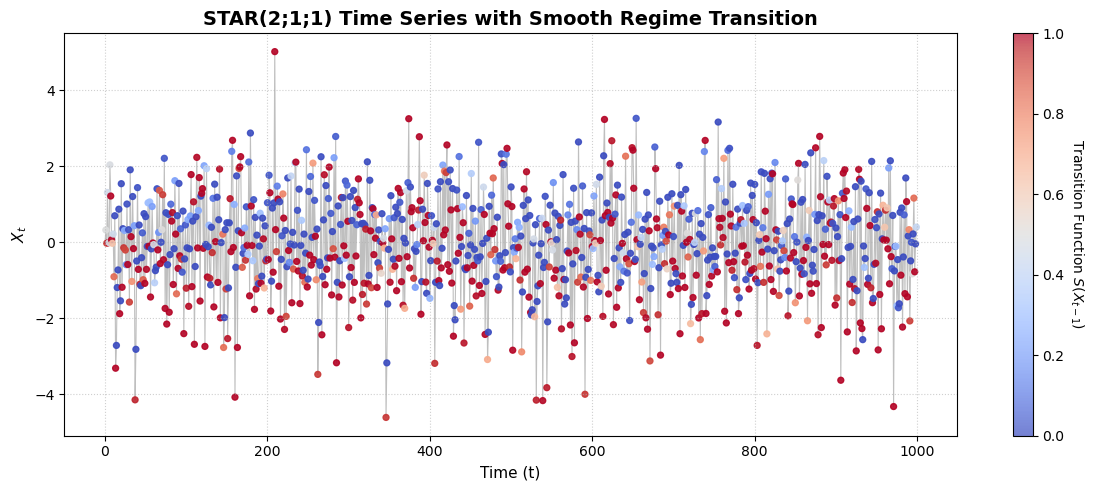

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

# ---------------------------------------------
# Simulate STAR(2;1;1) function
# ---------------------------------------------
def simulate_star(n=1000, a0 = 1.0, a1 = 0.6, b0 = -2.0, b1 = -0.2, alpha = 8.0, beta = 0.0, seed = 42):
    np.random.seed(seed)
    X = np.zeros(n)
    r1 = np.random.normal(0,1,n)
    r2 = np.random.normal(0,1,n)

    for t in range(1,n):
        S = sigmoid((X[t-1] - beta) * alpha)
        X[t] = a0 + a1 * X[t-1] + r1[t] + (b0 + b1 * X[t-1] + r2[t]) * S
    return X

alpha, beta = 8.0, 0.0
X = simulate_star(n=1000, a0 = 1.0, a1 = 0.6, b0 = -2.0, b1 = -0.2, alpha = 8.0, beta = 0.0, seed = 42)
t = np.arange(len(X))
S_values = sigmoid((X[:-1] - beta) * alpha)
colors = plt.cm.coolwarm(S_values) 


# ---------------------------------------------
# Plot series and lag plot
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [1.5, 1]})

# Time series
axes[0].plot(t, X, lw=1.2, color='steelblue', label='$X_t$')
axes[0].set_title("Time Series", fontsize=13, weight='bold')
axes[0].set_xlabel("t", fontsize=11)
axes[0].set_ylabel("$X_t$", fontsize=11)
axes[0].grid(True, linestyle=':', alpha=0.6)

# Lag plot X_t vs X_{t-1} (colored by transition value)
sc = axes[1].scatter(X[:-1], X[1:], c=S_values, cmap='coolwarm', alpha=0.7, s=12, edgecolor='none')
axes[1].set_title("Lag Plot: $X_t$ vs $X_{t-1}$", fontsize=13, weight='bold')
axes[1].set_xlabel("$X_{t-1}$", fontsize=11)
axes[1].set_ylabel("$X_t$", fontsize=11)
axes[1].grid(True, linestyle=':', alpha=0.6)

cbar = plt.colorbar(sc, ax=axes[1])
cbar.set_label("Transition Function $S(X_{t-1})$", rotation=270, labelpad=15)

fig.suptitle(
    f"STAR(2;1;1) Parameters: a0 = 1.0, a1 = 0.6, b0 = -1.0, b1 = 0.4, α={alpha}, β={beta}",
    fontsize=12, weight='bold', color='#333333', y=1.05
)

plt.tight_layout()
plt.show()

# ---------------------------------------------
# Time series colored by transition intensity
# ---------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(t[1:], X[1:], c=S_values, cmap='coolwarm', s=18, alpha=0.9)
ax.plot(t, X, color='gray', lw=0.8, alpha=0.5, zorder=0)

ax.set_title("STAR(2;1;1) Time Series with Smooth Regime Transition", fontsize=14, weight="bold")
ax.set_xlabel("Time (t)", fontsize=11)
ax.set_ylabel("$X_t$", fontsize=11)
ax.grid(True, linestyle=":", alpha=0.6)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Transition Function $S(X_{t-1})$", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

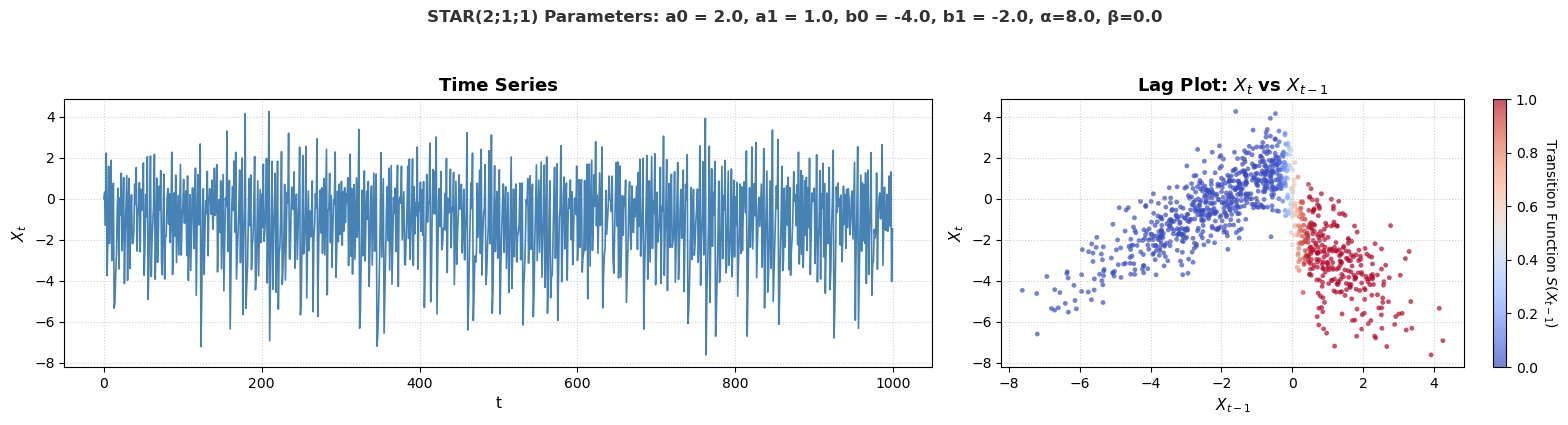

C:\Users\alba\AppData\Local\Temp\ipykernel_11520\889307895.py:52: UserWarning: Adding colorbar to a different Figure <Figure size 1600x400 with 3 Axes> than <Figure size 1200x500 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(sc, ax=ax)


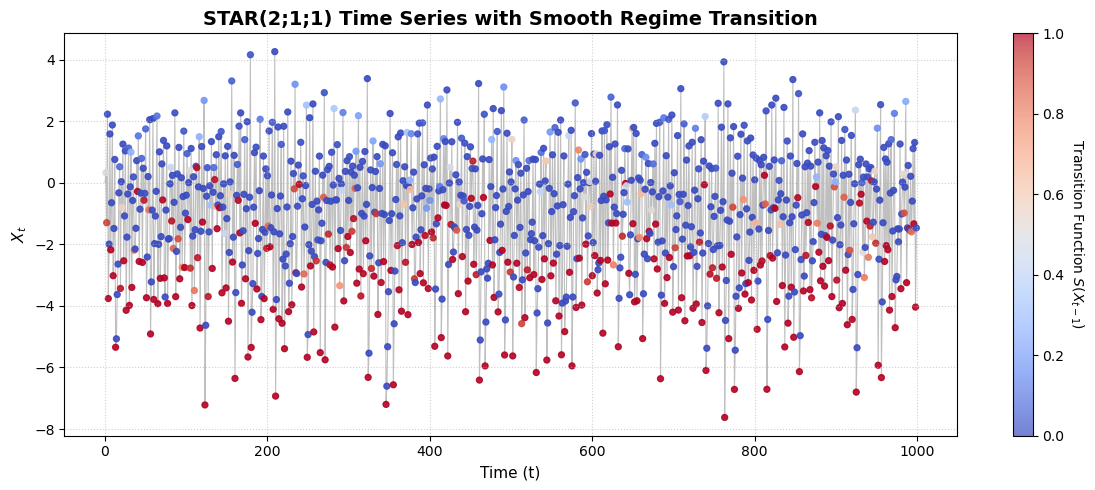

In [44]:
# ---------------------------------------------
# Change Parameter Configuration
# ---------------------------------------------
alpha, beta = 8.0, 0.0
X = simulate_star(n=1000, a0 = 2.0, a1 = 1.0, b0 = -4.0, b1 = -2.0, alpha = 8.0, beta = 0.0, seed = 42)
t = np.arange(len(X))
S_values = sigmoid((X[:-1] - beta) * alpha)
colors = plt.cm.coolwarm(S_values) 

# ---------------------------------------------
# Plot series and lag plot
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [1.5, 1]})

# Time series
axes[0].plot(t, X, lw=1.2, color='steelblue', label='$X_t$')
axes[0].set_title("Time Series", fontsize=13, weight='bold')
axes[0].set_xlabel("t", fontsize=11)
axes[0].set_ylabel("$X_t$", fontsize=11)
axes[0].grid(True, linestyle=':', alpha=0.6)

# Lag plot X_t vs X_{t-1} (colored by transition value)
sc = axes[1].scatter(X[:-1], X[1:], c=S_values, cmap='coolwarm', alpha=0.7, s=12, edgecolor='none')
axes[1].set_title("Lag Plot: $X_t$ vs $X_{t-1}$", fontsize=13, weight='bold')
axes[1].set_xlabel("$X_{t-1}$", fontsize=11)
axes[1].set_ylabel("$X_t$", fontsize=11)
axes[1].grid(True, linestyle=':', alpha=0.6)

cbar = plt.colorbar(sc, ax=axes[1])
cbar.set_label("Transition Function $S(X_{t-1})$", rotation=270, labelpad=15)

fig.suptitle(
    f"STAR(2;1;1) Parameters: a0 = 2.0, a1 = 1.0, b0 = -4.0, b1 = -2.0, α={alpha}, β={beta}",
    fontsize=12, weight='bold', color='#333333', y=1.05
)

plt.tight_layout()
plt.show()

# ---------------------------------------------
# Time series colored by transition intensity
# ---------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(t[1:], X[1:], c=S_values, cmap='coolwarm', s=18, alpha=0.9)
ax.plot(t, X, color='gray', lw=0.8, alpha=0.5, zorder=0)

ax.set_title("STAR(2;1;1) Time Series with Smooth Regime Transition", fontsize=14, weight="bold")
ax.set_xlabel("Time (t)", fontsize=11)
ax.set_ylabel("$X_t$", fontsize=11)
ax.grid(True, linestyle=":", alpha=0.6)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Transition Function $S(X_{t-1})$", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()
